In [1]:
import numpy as np
import matplotlib.pyplot as plt

import codecs
import re
import os.path

# Données reconnaissance du locuteur (Chirac/Mitterrand)

In [2]:
# Chargement des données:
def load_pres(fname):
    alltxts = []
    alllabs = []
    s=codecs.open(fname, 'r','utf-8') # pour régler le codage
    while True:
        txt = s.readline()
        if(len(txt))<5:
            break
        #
        lab = re.sub(r"<[0-9]*:[0-9]*:(.)>.*","\\1",txt)
        txt = re.sub(r"<[0-9]*:[0-9]*:.>(.*)","\\1",txt)
        if lab.count('M') >0:
            alllabs.append(-1)
        else: 
            alllabs.append(1)
        alltxts.append(txt)
    return alltxts,alllabs


In [3]:
fname = "./datasets/AFDpresidentutf8/corpus.tache1.learn.utf8"
alltxtsP,alllabsP = load_pres(fname)

In [4]:
print(len(alltxtsP),len(alllabsP))
print(alltxtsP[0])
print(alllabsP[0])
print(alltxtsP[-1])
print(alllabsP[-1])



57413 57413
 Quand je dis chers amis, il ne s'agit pas là d'une formule diplomatique, mais de l'expression de ce que je ressens.

1
 Je compte sur vous.

1


# Données classification de sentiments (films)

In [5]:
def load_movies(path2data): # 1 classe par répertoire
    alltxts = [] # init vide
    labs = []
    cpt = 0
    for cl in os.listdir(path2data): # parcours des fichiers d'un répertoire
        for f in os.listdir(path2data+cl):
            txt = open(path2data+cl+'/'+f).read()
            alltxts.append(txt)
            labs.append(cpt)
        cpt+=1 # chg répertoire = cht classe
        
    return alltxts,labs


In [6]:
path = "./datasets/movies/movies1000/"

alltxtsM,alllabsM = load_movies(path)

In [7]:
print(len(alltxtsM),len(alllabsM))
print(alltxtsM[0])
print(alllabsM[0])
print(alltxtsM[-1])
print(alllabsM[-1])

2000 2000
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , 

#### A) Transformation paramétrique du texte (pre-traitements)

Vous devez tester, par exemple, les cas suivants:
- transformation en minuscule ou pas
- suppression de la ponctuation
- transformation des mots entièrement en majuscule en marqueurs spécifiques
- suppression des chiffres ou pas
- conservation d'une partie du texte seulement (seulement la première ligne = titre, seulement la dernière ligne = résumé, ...)
- stemming
- ...


Vérifier systématiquement sur un exemple ou deux le bon fonctionnement des méthodes sur deux documents (au moins un de chaque classe).

In [8]:
def lowercase(text):
    text=text.lower()
    return text

In [9]:
print(lowercase(alltxtsP[0]))
print(lowercase(alltxtsM[0]))

 quand je dis chers amis, il ne s'agit pas là d'une formule diplomatique, mais de l'expression de ce que je ressens.

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it s

In [10]:
import string

def del_punc(text):    
    punc = string.punctuation  
    punc += '\n\r\t'
    text = text.translate(str.maketrans(punc, ' ' * len(punc)))  
    return text


In [11]:
print(del_punc(alltxtsP[0]))
print(del_punc(alltxtsM[0]))

 Quand je dis chers amis  il ne s agit pas là d une formule diplomatique  mais de l expression de ce que je ressens  
plot   two teen couples go to a church party   drink and then drive    they get into an accident    one of the guys dies   but his girlfriend continues to see him in her life   and has nightmares    what s the deal    watch the movie and   sorta   find out        critique   a mind fuck movie for the teen generation that touches on a very cool idea   but presents it in a very bad package    which is what makes this review an even harder one to write   since i generally applaud films which attempt to break the mold   mess with your head and such   lost highway   memento     but there are good and bad ways of making all types of films   and these folks just didn t snag this one correctly    they seem to have taken this pretty neat concept   but executed it terribly    so what are the problems with the movie    well   its main problem is that it s simply too jumbled    it s

In [12]:
import re

def transfo_excl(text):
    text = re.sub('[A-Z]+ ', 'majuscules ', text)  
    return text


In [13]:
print(transfo_excl(alltxtsP[0]))
print(transfo_excl(alltxtsM[0]))
print(transfo_excl('WAOUW incroyable !'))

 Quand je dis chers amis, il ne s'agit pas là d'une formule diplomatique, mais de l'expression de ce que je ressens.

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it s

In [14]:
def del_number(text):
    text = re.sub('[0-9]+', '', text) # remplacer une séquence de chiffres par rien
    return text

In [15]:
print(del_number(alltxtsP[411]))
print(del_number(alltxtsM[0]))
print(del_number("4 place Jussieu"))

 En vous nommant, le  avril <date>, chef d'état-major des armées, je savais que je confiais cette éminente responsabilité à un officier brillant qui avait obtenu dans les emplois les plus divers des résultats exceptionnels.

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 

# B) Extraction du vocabulaire (BoW)

- **Exploration préliminaire des jeux de données**
    - Quelle est la taille d'origine du vocabulaire?
    - Que reste-t-il si on ne garde que les 100 mots les plus fréquents? [word cloud]
    - Quels sont les 100 mots dont la fréquence documentaire est la plus grande? [word cloud]
    - Quels sont les 100 mots les plus discriminants au sens de odds ratio? [word cloud]
    - Quelle est la distribution d'apparition des mots (Zipf)
    - Quels sont les 100 bigrammes/trigrammes les plus fréquents?

- **Variantes de BoW**
    - TF-IDF
    - Réduire la taille du vocabulaire (min_df, max_df, max_features)
    - BoW binaire
    - Bi-grams, tri-grams
    - **Quelles performances attendrent? Quels sont les avantages et les inconvénients des ces variantes?**

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

#taille d'origine du vocabulaire
vectorizerP = TfidfVectorizer(use_idf= True, smooth_idf=True, sublinear_tf=False)
vectorizerM = TfidfVectorizer(use_idf= True, smooth_idf=True, sublinear_tf=False)

XP = vectorizerP.fit_transform(alltxtsP)
XM = vectorizerM.fit_transform(alltxtsM)

print("taille vocabulaire Presidents : ", XP.shape[1])
print("taille vocabulaire Movies : ", XM.shape[1])


taille vocabulaire Presidents :  28524
taille vocabulaire Movies :  39659


In [19]:
from collections import Counter 
from wordcloud import WordCloud

def word_cloud_100_most_frequent(vectorizer, corpus,title):
    X = vectorizer.fit_transform(corpus)
    vocab = vectorizer.get_feature_names_out()
    count = X.sum(axis=0).T #somme sur les colonnes
    counter_word_count = Counter({vocab[i] : int(count[i]) for i in range(len(vocab))})
    top100 = counter_word_count.most_common(100)
    wordcloud = WordCloud(background_color = 'white', max_words = 100).generate_from_frequencies(dict(top100))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show();


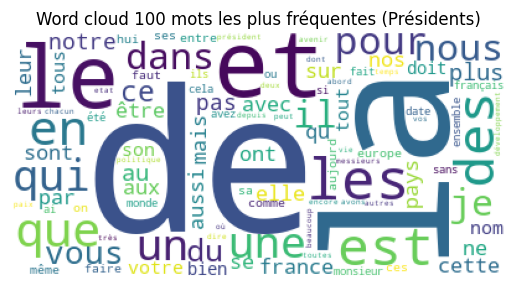

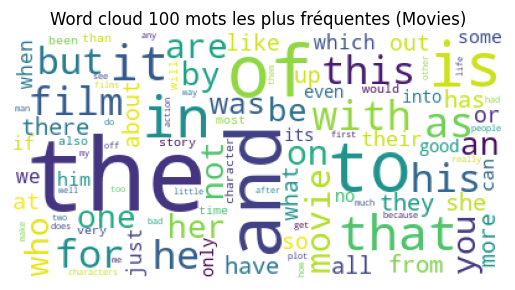

In [20]:
word_cloud_100_most_frequent(vectorizerP, alltxtsP, "Word cloud 100 mots les plus fréquentes (Présidents)")
word_cloud_100_most_frequent(vectorizerM, alltxtsM, "Word cloud 100 mots les plus fréquentes (Movies)")


Quels sont les 100 mots dont la fréquence documentaire est la plus grande? [word cloud]

In [31]:
import nltk
nltk.download('punkt')

Tokenizer = nltk.RegexpTokenizer(r'\w')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nolwe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
def freq_plus_grande(vectorizer, corpus,title):
    for artist, block_ids in lt_artists.iteritems():
        for block_id in block_ids:
            tokens=tokenizer.tokenize(db_flat[block_id]['text'].decode('utf-8').lower())
            corpora[artist] += [w for w in tokens if not w in list(sw)] #on ajoute si c’est deja compris dans la liste des stops words
    stats, freq = dict(), dict()
    for k, v in corpora.iteritems():
        freq[k] = fq = nltk.FreqDist(v)
        stats[k] = {'total': len(v), 'unique': len(fq.keys())}
    return (freq, stats, corpora)



In [38]:
freq2, stats2, corpora2=freq_stats_corpora2()
df2=pd.DataFrame.from_dict(stats2, orient='index').sort(column='unique', ascending='False')


NameError: name 'defaultdict' is not defined

Odds- ratio

In [28]:
import scipy.stats as stats
import pandas as pd
df=pd.DataFrame({'p':alltxtsP,'m':alltxtsM})
ct=pd.crosstab(df.c,df.l)
oddsratio, pvalue = stats.fisher_exact(ct)

ValueError: All arrays must be of the same length

In [22]:
def odds_ratio(corpus):

    corpus_notes_positives = corpus[df.note >= mean]
    corpus_notes_negatives = corpus[df.note < mean]

    class1_words = ' '.join(corpus_notes_positives).split()
    class2_words = ' '.join(corpus_notes_negatives).split()

    class1_counter = Counter(class1_words)
    class2_counter = Counter(class2_words)

    odds_ratios = {}

    for word, freq_class1 in class1_counter.items():
        freq_class2 = class2_counter[word]
        total_words_class1 = sum(class1_counter.values())
        total_words_class2 = sum(class2_counter.values())
        odds_ratios[word] = ((freq_class1 + 1) / (total_words_class1 + len(class1_counter))) / ((freq_class2 + 1) / (total_words_class2 + len(class2_counter)))

    sorted_odds_ratios = sorted(odds_ratios.items(), key=lambda x: x[1], reverse=True)
    top_100_odds_ratios = dict(sorted_odds_ratios[:100])

    wc = WordCloud().generate_from_frequencies(top_100_odds_ratios)
    plt.figure(figsize=(10, 8))
    plt.title('Word cloud 100 top odds ratio')
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

odds_ratio(alltxtsP)

NameError: name 'df' is not defined

# C) Modèles de Machine Learning

## 1) Métriques d'évaluation 

Il faudra utiliser des métriques d'évaluation pertinentes suivant la tâche et l'équilibrage des données : 
- Accuracy
- Courbe ROC, AUC, F1-score

## 2) Variantes sur les stratégies d'entraînement

- **Sur-apprentissage**. Les techniques sur lesquelles nous travaillons étant sujettes au sur-apprentissage: trouver le paramètre de régularisation dans la documentation et optimiser ce paramètre au sens de la métrique qui vous semble la plus appropriée (cf question précédente).

 <br>
- **Equilibrage des données**. Un problème reconnu comme dur dans la communauté est celui de l'équilibrage des classes (*balance* en anglais). Que faire si les données sont à 80, 90 ou 99% dans une des classes?
Le problème est dur mais fréquent; les solutions sont multiples mais on peut isoler 3 grandes familles de solution.

1. Ré-équilibrer le jeu de données: supprimer des données dans la classe majoritaire et/ou sur-échantilloner la classe minoritaire.<BR>
   $\Rightarrow$ A vous de jouer pour cette technique
1. Changer la formulation de la fonction de coût pour pénaliser plus les erreurs dans la classe minoritaire:
soit une fonction $\Delta$ mesurant les écarts entre $f(x_i)$ et $y_i$ 
$$C = \sum_i  \alpha_i \Delta(f(x_i),y_i), \qquad \alpha_i = \left\{
\begin{array}{ll}
1 & \text{si } y_i \in \text{classe majoritaire}\\
B>1 & \text{si } y_i \in \text{classe minoritaire}\\
\end{array} \right.$$
<BR>
   $\Rightarrow$ Les SVM et d'autres approches sklearn possèdent des arguments pour régler $B$ ou $1/B$... Ces arguments sont utiles mais pas toujours suffisant.
1. Courbe ROC et modification du biais. Une fois la fonction $\hat y = f(x)$ apprise, il est possible de la *bidouiller* a posteriori: si toutes les prédictions $\hat y$ sont dans une classe, on va introduire $b$ dans $\hat y = f(x) + b$ et le faire varier jusqu'à ce qu'un des points change de classe. On peut ensuite aller de plus en plus loin.
Le calcul de l'ensemble des scores associés à cette approche mène directement à la courbe ROC.

**Note:** certains classifieurs sont intrinsèquement plus résistante au problème d'équilibrage, c'est par exemple le cas des techniques de gradient boosting que vous verrez l'an prochain.


## 3) Estimer les performances de généralisation d'une méthodes
**Ce sera l'enjeu principal du projet : vous disposez d'un ensemble de données, et vous évaluerez les performances sur un ensemble de test auquel vous n'avez pas accès. Il faut donc être capable d'estimer les performances de généralisation du modèles à partir des données d'entraînement.**


Avant de lancer de grandes expériences, il faut se construire une base de travail solide en étudiant les questions suivantes:

- Combien de temps ça prend d'apprendre un classifieur NB/SVM/RegLog sur ces données en fonction de la taille du vocabulaire?
- La validation croisée est-elle nécessaire? Est ce qu'on obtient les mêmes résultats avec un simple *split*?
- La validation croisée est-elle stable? A partir de combien de fold (travailler avec différentes graines aléatoires et faire des statistiques basiques)?